In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/stroke_risk_dataset_v2.csv')
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,33.3,0.0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,100.0,1.0
2,63,Female,0,1,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,100.0,1.0
3,41,Male,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,44.5,0.0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,84.8,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22796 entries, 0 to 22795
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     22796 non-null  int64  
 1   gender                  22796 non-null  object 
 2   chest_pain              22796 non-null  int64  
 3   high_blood_pressure     22796 non-null  int64  
 4   irregular_heartbeat     22796 non-null  int64  
 5   shortness_of_breath     22796 non-null  int64  
 6   fatigue_weakness        22796 non-null  int64  
 7   dizziness               22796 non-null  int64  
 8   swelling_edema          22796 non-null  int64  
 9   neck_jaw_pain           22796 non-null  int64  
 10  excessive_sweating      22796 non-null  int64  
 11  persistent_cough        22796 non-null  int64  
 12  nausea_vomiting         22795 non-null  float64
 13  chest_discomfort        22795 non-null  float64
 14  cold_hands_feet         22795 non-null

In [6]:
hapus = ['stroke_risk_percentage']
df = df.drop(columns=hapus, errors='ignore')

In [7]:
df.isnull().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


In [10]:
df.dropna(inplace=True)
df.describe()


,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
count,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.00000,22795.000000,22795.000000,22795.000000
mean,38.694977,0.145427,0.251853,0.099364,0.188199,0.246194,0.189954,0.145470,0.098530,0.099232,0.106690,0.096118,0.145383,0.19478,0.147488,0.098574,0.371704
std,11.557085,0.352538,0.434087,0.299157,0.390880,0.430803,0.392273,0.352582,0.298037,0.298980,0.308726,0.294759,0.352494,0.39604,0.354600,0.298096,0.483271
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,46.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [11]:
print(f'jumlah duplikat sebelum = {df.duplicated().sum()}')

jumlah duplikat sebelum = 9460


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print(f'jumlah duplikat sesudah = {df.duplicated().sum()}')

jumlah duplikat sesudah = 0


In [14]:
print(f"\nUkuran Dataset: {df.shape[0]} baris, {df.shape[1]} kolom")


Ukuran Dataset: 13335 baris, 18 kolom


In [15]:
for col in ['gender']:
    if col in df.columns:
        print(f"\nNilai Unik di Kolom '{col}':")
        print(df[col].unique())


Nilai Unik di Kolom 'gender':
['Male' 'Female']


In [16]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [17]:
print("Mean setelah normalisasi:")
print(pd.DataFrame(df).mean())

print("\nStandar Deviasi setelah normalisasi:")
print(pd.DataFrame(df).std())

Mean setelah normalisasi:
age                    42.686914
gender                  0.504612
chest_pain              0.206824
high_blood_pressure     0.337008
irregular_heartbeat     0.153206
shortness_of_breath     0.260367
fatigue_weakness        0.312111
dizziness               0.257743
swelling_edema          0.209749
neck_jaw_pain           0.149681
excessive_sweating      0.146157
persistent_cough        0.160180
nausea_vomiting         0.141432
chest_discomfort        0.209374
cold_hands_feet         0.260592
snoring_sleep_apnea     0.214323
anxiety_doom            0.143907
at_risk                 0.584177
dtype: float64

Standar Deviasi setelah normalisasi:
age                    11.809046
gender                  0.499997
chest_pain              0.405043
high_blood_pressure     0.472705
irregular_heartbeat     0.360199
shortness_of_breath     0.438852
fatigue_weakness        0.463372
dizziness               0.437408
swelling_edema          0.407145
neck_jaw_pain           0.3567

In [18]:
print("Distribusi Kelas Target:")
print(df['at_risk'].value_counts())

Distribusi Kelas Target:
at_risk
1.0    7790
0.0    5545
Name: count, dtype: int64


In [19]:
labels = df['at_risk']

# Remove the labels from the features
df = df.drop('at_risk', axis = 1)

# Saving feature names for later use
feature_list = list(df.columns)

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(df,
                                                                            labels,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [21]:
train_features.shape, test_features.shape

((10668, 17), (2667, 17))

In [22]:
test_features.dtypes

,0
age,int64
gender,int64
chest_pain,int64
high_blood_pressure,int64
irregular_heartbeat,int64
shortness_of_breath,int64
fatigue_weakness,int64
dizziness,int64
swelling_edema,int64
neck_jaw_pain,int64


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfC = RandomForestClassifier(random_state = 0)
rfC.fit(train_features, train_labels)

predict = rfC.predict(test_features)

print(f"Akurasi: {accuracy_score(test_labels, predict)}")

Akurasi: 0.9362579677540307


In [24]:
rfC_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfC_100.fit(train_features, train_labels)

predict = rfC_100.predict(test_features)

print(f"Akurasi: {accuracy_score(test_labels, predict)}")

Akurasi: 0.9362579677540307


In [25]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)
clf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=50, random_state=0)

In [26]:
feature_scores = pd.Series(clf.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_scores

,0
age,0.463475
high_blood_pressure,0.104703
chest_pain,0.060977
shortness_of_breath,0.044366
snoring_sleep_apnea,0.041313
chest_discomfort,0.037168
fatigue_weakness,0.032369
irregular_heartbeat,0.032340
cold_hands_feet,0.028449
gender,0.027855


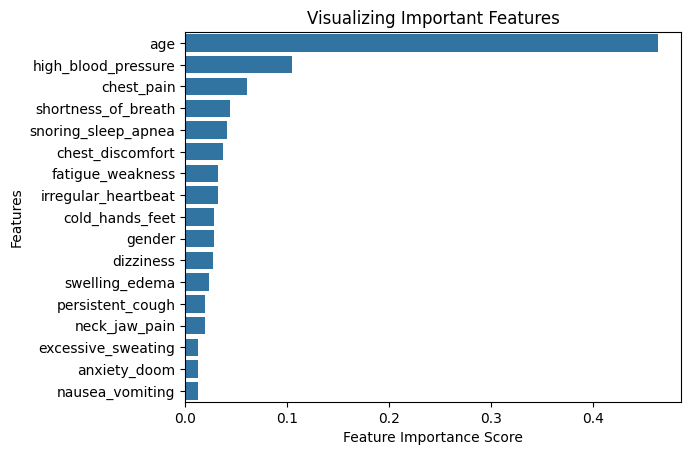

In [27]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

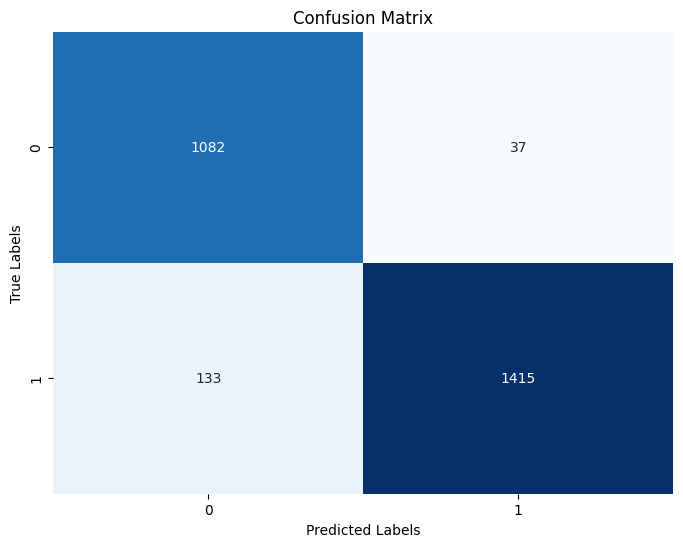

In [28]:
cm = confusion_matrix(test_labels, predict)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predict))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1119
         1.0       0.97      0.91      0.94      1548

    accuracy                           0.94      2667
   macro avg       0.93      0.94      0.94      2667
weighted avg       0.94      0.94      0.94      2667

